In [540]:
from numpy import loadtxt
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.python.keras.layers import Dropout, BatchNormalization, Flatten
from keras import regularizers
from knn_imputer import *
from tensorflow.keras.layers import Dense
from sklearn import preprocessing 
% pylab inline

#train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")
train = pd.read_csv("train_knn.csv")
test = pd.read_csv("test_knn.csv")
train.head()

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [541]:
np.isnan(train.loc[0, 'Alley'])

True

In [542]:
size(train.columns[train.isnull().sum() > 0])

16

In [543]:
size(test.columns[test.isnull().sum() > 0])

22

In [544]:
size(imputed_data1.columns[imputed_data1.isnull().sum() > 0])

0

In [545]:
#train.isnull().sum()

In [546]:
def my_knn(train, test):
    
    train_knn = train
    while size(train_knn.columns[train_knn.isnull().sum() > 0]) > 0 :
        knn_impute_data = train_knn
        col_list = knn_impute_data.columns
        knn_list = []

        for l in col_list:
            knn_list.append(knn_impute(knn_impute_data.loc[:,l],knn_impute_data.drop(columns = l, axis = 1), 
                                      k_neighbors = 5, aggregation_method="median",
                                      numeric_distance='gower',
                                      categorical_distance="gower", missing_neighbors_threshold = 0.8))

        imputed_train = pd.concat(knn_list, axis = 1, join = 'outer')
        train_knn = imputed_train
        
    for col in train_knn.columns:
        train.loc[:, col] = train_knn.loc[:, col]
    
    
    if (test is not None) :
        test_knn = test
        while size(test_knn.columns[test_knn.isnull().sum() > 0]) > 0 :
            knn_impute_data = test_knn
            col_list = knn_impute_data.columns
            knn_list = []

            for l in col_list:
                knn_list.append(knn_impute(knn_impute_data.loc[:,l],knn_impute_data.drop(columns = l, axis = 1), 
                                          k_neighbors = 5, aggregation_method="median",
                                          numeric_distance='gower',
                                          categorical_distance="gower", missing_neighbors_threshold = 0.8))

            imputed_test = pd.concat(knn_list, axis = 1, join = 'outer')
            test_knn = imputed_test

        for col in test_knn.columns:
            test.loc[:, col] = test_knn.loc[:, col]
    
    if (test is not None) :
        return (train, test)
    else:
        return train

In [547]:
#train, test = my_knn(train.copy(), test.copy())
#train.to_csv('train_knn.csv', index=0)
#test.to_csv('test_knn.csv', index=0)

In [548]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [549]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [550]:
y_label = train.loc[:, ['SalePrice']]
test_id = test.iloc[:, 0]
print(test_id[:5])

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64


In [551]:
def my_min_max_normalization(train, test):
    for i in range(len(train.iloc[0, :])):
        col = train.iloc[0, i]
        if (type(col) is numpy.int64 or type(col) is numpy.float64):
            train.iloc[:, i] = train.iloc[:, i] / train.iloc[:, i].max()
            
    if (test is not None) :
        for i in range(len(test.iloc[0, :])):
            col = test.iloc[0, i]
            if (type(col) is numpy.int64 or type(col) is numpy.float64):
                test.iloc[:, i] = test.iloc[:, i] / test.iloc[:, i].max()
    
    if (test is not None) :
        return (train, test)
    else:
        return train

In [552]:
def my_std_normalization(train, test):
    for i in range(len(train.iloc[0, :])):
        col = train.iloc[0, i]

        if (type(col) is numpy.int64 or type(col) is numpy.float64):
            std = train.iloc[:, i].std()
            mean = train.iloc[:, i].mean()
            train.iloc[:, i] = (train.iloc[:, i] - mean) / std
            
    if (test is not None) :
        for i in range(len(test.iloc[0, :])):
            col = test.iloc[0, i]
            
            if (type(col) is numpy.int64 or type(col) is numpy.float64):
                std = test.iloc[:, i].std()
                mean = test.iloc[:, i].mean()
                test.iloc[:, i] = (test.iloc[:, i] - mean) / std
    
    if (test is not None) :
        return (train, test)
    else:
        return train
    

In [553]:
def my_one_hot_encoding(train, test, col_name, debug=False):
    col_value_unique = train.loc[:, col_name].sort_values(ascending=True).unique()
    mapping = {}
    i = 0
    
    #find unique value
    for item in range(col_value_unique.size):
        
        #if col_value_unique[item] is nan:
        #    print(col_value_unique[item])
        #    continue
        if col_value_unique[item] not in mapping:
            mapping[col_value_unique[item]] = i
            i += 1
            
    if (test is not None) :
        col_value_unique = test.loc[:, col_name].sort_values(ascending=True).unique()
        for item in range(col_value_unique.size):
            #if col_value_unique[item] is nan:
            #    print(col_value_unique[item])
            #    continue
            if col_value_unique[item] not in mapping:
                mapping[col_value_unique[item]] = i
                i += 1
           
    #original
    train_col_ori = train[col_name]
    if (test is not None) :
        test_col_ori = test[col_name]
    
    #label encoding
    train[col_name] = train[col_name].map(mapping)
    if (test is not None) :
        test[col_name] = test[col_name].map(mapping)

    #one-hot encoding
    train_one_hot = np.zeros((len(train), len(mapping)))
    train_one_hot[np.arange(len(train)), train[col_name]] = 1
    train_one_hot_df = pd.DataFrame(train_one_hot, columns=mapping)
    
    if (test is not None) :
        test_one_hot = np.zeros((len(test), len(mapping)))
        test_one_hot[np.arange(len(test)), test[col_name]] = 1
        test_one_hot_df = pd.DataFrame(test_one_hot, columns=mapping)
    
    if (debug == True):
        train_one_hot_df = pd.concat([train_col_ori, train_one_hot_df], axis=1)
        if (test is not None) :
            test_one_hot_df = pd.concat([test_col_ori, test_one_hot_df], axis=1)
    
    if (test is not None) :
        return (train_one_hot_df, test_one_hot_df)
    else:
        return train_one_hot_df

In [554]:
def my_boolean_encoding(train, test):
    boolean_mapping = {False:0, True:1}

    for i in range(len(train.iloc[0, :])):
        col = train.iloc[0, i]
        if (type(col) is numpy.bool_):
            train.iloc[:, i] = train.iloc[:, i].map(boolean_mapping)
            
    if (test is not None) :
        for i in range(len(test.iloc[0, :])):
            col = test.iloc[0, i]
            if (type(col) is numpy.bool_):
                test.iloc[:, i] = test.iloc[:, i].map(boolean_mapping)
    
    if (test is not None) :
        return (train, test)
    else:
        return train

In [555]:
#y_label_one_hot = my_one_hot_encoding(y_label.copy(), None, 'SalePrice')

if 'SalePrice' in train.columns:
    train = train.drop('SalePrice', axis=1)

if 'Id' in train.columns:
    train = train.drop('Id', axis=1)
    
if 'Id' in test.columns:
    test = test.drop('Id', axis=1)
    

#if 'appearedHour' in train.columns:
#    train = train.drop('appearedHour', axis=1)
#    test = test.drop('appearedHour', axis=1)
    
#if 'appearedMinute' in train.columns:
#    train = train.drop('appearedMinute', axis=1)
#    test = test.drop('appearedMinute', axis=1)
    
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [556]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [557]:
train, test = my_std_normalization(train, test)
train, test = my_min_max_normalization(train, test)


train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.023311,RL,-0.019981,-0.010095,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,0.084352,WD,Normal
1,-0.277209,RL,0.041711,-0.004478,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.232811,-0.373471,WD,Normal
2,0.023311,RL,-0.007643,0.003581,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,0.471653,0.084352,WD,Normal
3,0.098441,RL,-0.040546,-0.004722,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,-0.831295,WD,Abnorml
4,0.023311,RL,0.058162,0.018284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,1.000000,0.084352,WD,Normal


In [558]:
train, test = my_boolean_encoding(train.copy(), test.copy())
train.head()
#train.to_csv("train_bool.csv", index=0)
#test.to_csv("test_bool.csv", index=0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.023311,RL,-0.019981,-0.010095,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,0.084352,WD,Normal
1,-0.277209,RL,0.041711,-0.004478,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.232811,-0.373471,WD,Normal
2,0.023311,RL,-0.007643,0.003581,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,0.471653,0.084352,WD,Normal
3,0.098441,RL,-0.040546,-0.004722,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,-0.831295,WD,Abnorml
4,0.023311,RL,0.058162,0.018284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,1.000000,0.084352,WD,Normal


In [559]:
train.loc[:, 'Alley'].sort_values(ascending=True).unique()

array(['Grvl', 'Pave', nan], dtype=object)

In [560]:
one_hot_list = ['Alley']


print(one_hot_list)
for col in train.columns:
    if col in one_hot_list:
        train_col_one_hot, test_col_one_hot = my_one_hot_encoding(train.copy(), test.copy(), col)
        train = pd.concat([train, train_col_one_hot.iloc[:, 1:]], axis=1)
        test = pd.concat([test, test_col_one_hot.iloc[:, 1:]], axis=1)
        train = train.drop(col, axis=1)
        test = test.drop(col, axis=1)
        
train.to_csv("train_housing.csv", index=0)
test.to_csv("test_housing.csv", index=0)
train.head()

['Alley']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pave,nan
0,0.023311,RL,-0.019981,-0.010095,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,-0.002814,-0.761158,0.084352,WD,Normal,0.0,1.0
1,-0.277209,RL,0.041711,-0.004478,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,-0.002814,-0.232811,-0.373471,WD,Normal,0.0,1.0
2,0.023311,RL,-0.007643,0.003581,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,-0.002814,0.471653,0.084352,WD,Normal,0.0,1.0
3,0.098441,RL,-0.040546,-0.004722,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,NaN,NaN,-0.002814,-0.761158,-0.831295,WD,Abnorml,0.0,1.0
4,0.023311,RL,0.058162,0.018284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,-0.002814,1.000000,0.084352,WD,Normal,0.0,1.0


In [561]:
train.columns[train.isnull().sum() > 0]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [562]:
size(train.columns[train.isnull().sum() > 0])

15

In [563]:
test.columns[train.isnull().sum() > 0]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [564]:
one_hot_list = ['Alley']

#for col in train.columns:
for i in range(len(train.iloc[0, :])):
    col = train.iloc[0, i]
    if (type(col)) is str:
        one_hot_list.append(train.columns[i])

        
print(one_hot_list)
for col in train.columns:
    if col in one_hot_list:
        train_col_one_hot, test_col_one_hot = my_one_hot_encoding(train.copy(), test.copy(), col)
        train = pd.concat([train, train_col_one_hot.iloc[:, 1:]], axis=1)
        test = pd.concat([test, test_col_one_hot.iloc[:, 1:]], axis=1)
        train = train.drop(col, axis=1)
        test = test.drop(col, axis=1)
        
train.to_csv("train_housing.csv", index=0)
test.to_csv("test_housing.csv", index=0)
train.head()

['Alley', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,nan,AdjLand,Alloca,Family,Normal,Partial
0,0.023311,-0.019981,-0.010095,0.230904,-0.168,0.819272,0.721496,0.061868,0.050450,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.277209,0.041711,-0.004478,-0.025461,0.708,0.122177,-0.352736,-0.069096,0.102754,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.023311,-0.007643,0.003581,0.230904,-0.168,0.767635,0.681709,0.039150,0.008146,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.098441,-0.040546,-0.004722,0.230904,-0.168,-1.452740,-0.591454,-0.069096,-0.043774,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.023311,0.058162,0.018284,0.487270,-0.168,0.741817,0.602136,0.164769,0.040643,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [565]:
test.columns[test.isnull().sum() > 0]

Index(['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [566]:
train.columns[train.isnull().sum() > 0]

Index(['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [567]:
for col in test.columns[test.isnull().sum() > 0]:
    test = test.drop(col, axis=1)
    
for col in train.columns[train.isnull().sum() > 0]:
    train = train.drop(col, axis=1)

In [568]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,nan,AdjLand,Alloca,Family,Normal,Partial
0,-0.281842,0.085871,0.038538,-0.275127,0.129475,-0.268043,-0.860485,-0.084185,0.008077,0.062044,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.281842,0.093488,0.095078,-0.020101,0.129475,-0.345678,-0.974392,0.006584,0.135498,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.019768,0.040164,0.085737,-0.275127,-0.160700,0.663580,0.544371,-0.084185,0.098532,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.019768,0.070635,0.003395,-0.020101,0.129475,0.689459,0.544371,-0.067376,0.045603,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.472183,-0.195986,-0.102909,0.489949,-0.160700,0.534188,0.316556,-0.084185,-0.049332,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [569]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,nan,AdjLand,Alloca,Family,Normal,Partial
0,0.023311,-0.019981,-0.010095,0.230904,-0.168,0.819272,0.721496,0.061868,0.050450,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.277209,0.041711,-0.004478,-0.025461,0.708,0.122177,-0.352736,-0.069096,0.102754,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.023311,-0.007643,0.003581,0.230904,-0.168,0.767635,0.681709,0.039150,0.008146,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.098441,-0.040546,-0.004722,0.230904,-0.168,-1.452740,-0.591454,-0.069096,-0.043774,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.023311,0.058162,0.018284,0.487270,-0.168,0.741817,0.602136,0.164769,0.040643,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [570]:
train.to_csv("train_housing.csv", index=0)
test.to_csv("test_housing.csv", index=0)

In [571]:

number = 30

for i in range(2, number):  #power of 1 is already there
    colname = 'MSSubClass_%d'%i      #new var will be x_power
    train[colname] = train['MSSubClass']**i

for i in range(2, number):  #power of 1 is already there
    colname = 'LotFrontage_%d'%i      #new var will be x_power
    train[colname] = train['LotFrontage']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'LotArea_%d'%i      #new var will be x_power
    train[colname] = train['LotArea']**i

for i in range(2, number):  #power of 1 is already there
    colname = 'OverallQual_%d'%i      #new var will be x_power
    train[colname] = train['OverallQual']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'OverallCond_%d'%i      #new var will be x_power
    train[colname] = train['OverallCond']**i
    

    
for i in range(2, number):  #power of 1 is already there
    colname = 'MSSubClass_%d'%i      #new var will be x_power
    test[colname] = test['MSSubClass']**i

for i in range(2, number):  #power of 1 is already there
    colname = 'LotFrontage_%d'%i      #new var will be x_power
    test[colname] = test['LotFrontage']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'LotArea_%d'%i      #new var will be x_power
    test[colname] = test['LotArea']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'OverallQual_%d'%i      #new var will be x_power
    test[colname] = test['OverallQual']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'OverallCond_%d'%i      #new var will be x_power
    test[colname] = test['OverallCond']**i

    

In [572]:
x_train, x_valid, y_train, y_valid = train_test_split(train, y_label, random_state = 7, test_size = 0.13)

In [573]:
y_valid.head()

,SalePrice
606,152000
1210,189000
492,172785
410,60000
396,123000


In [574]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(x_train.iloc[0,:].size)
print(y_train.iloc[0,:].size)

(1270, 392)
(190, 392)
(1270, 1)
(190, 1)
392
1


In [576]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OverallCond_20,OverallCond_21,OverallCond_22,OverallCond_23,OverallCond_24,OverallCond_25,OverallCond_26,OverallCond_27,OverallCond_28,OverallCond_29
985,1.000000,-0.007643,0.001774,-0.281826,-0.168,-0.549099,-1.387181,-0.069096,0.114677,-0.03261,...,3.207640e-16,-5.388835e-17,9.053243e-18,-1.520945e-18,2.555187e-19,-4.292715e-20,7.211761e-21,-1.211576e-21,2.035447e-22,-3.419552e-23
547,0.211136,-0.065222,-0.015986,-0.281826,0.416,-0.032733,-0.591454,-0.069096,0.033721,-0.03261,...,2.409165e-08,1.002213e-08,4.169205e-09,1.734389e-09,7.215060e-10,3.001465e-10,1.248609e-10,5.194215e-11,2.160793e-11,8.988901e-12
1078,0.474090,-0.135141,-0.029707,-0.025461,-0.168,0.845090,0.761282,0.043827,0.041989,-0.03261,...,3.207640e-16,-5.388835e-17,9.053243e-18,-1.520945e-18,2.555187e-19,-4.292715e-20,7.211761e-21,-1.211576e-21,2.035447e-22,-3.419552e-23
1457,0.098441,-0.015869,-0.007204,0.230904,1.000,-0.781464,0.840855,-0.069096,-0.032428,-0.03261,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
128,0.023311,-0.003530,-0.014296,-0.025461,-0.168,-0.136006,-0.750600,0.108641,0.013145,-0.03261,...,3.207640e-16,-5.388835e-17,9.053243e-18,-1.520945e-18,2.555187e-19,-4.292715e-20,7.211761e-21,-1.211576e-21,2.035447e-22,-3.419552e-23


In [577]:
x_valid.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OverallCond_20,OverallCond_21,OverallCond_22,OverallCond_23,OverallCond_24,OverallCond_25,OverallCond_26,OverallCond_27,OverallCond_28,OverallCond_29
606,-0.277209,0.049937,0.009511,-0.281826,-0.168,0.638544,0.442991,-0.069096,0.055450,-0.03261,...,3.207640e-16,-5.388835e-17,9.053243e-18,-1.520945e-18,2.555187e-19,-4.292715e-20,7.211761e-21,-1.211576e-21,2.035447e-22,-3.419552e-23
1210,0.023311,0.000583,0.003425,-0.025461,-0.168,0.535270,0.283846,-0.069096,-0.085309,-0.03261,...,3.207640e-16,-5.388835e-17,9.053243e-18,-1.520945e-18,2.555187e-19,-4.292715e-20,7.211761e-21,-1.211576e-21,2.035447e-22,-3.419552e-23
492,0.023311,0.144532,0.024721,-0.025461,-0.168,0.896727,0.840855,-0.069096,-0.085309,-0.03261,...,3.207640e-16,-5.388835e-17,9.053243e-18,-1.520945e-18,2.555187e-19,-4.292715e-20,7.211761e-21,-1.211576e-21,2.035447e-22,-3.419552e-23
410,-0.277209,-0.007643,-0.004620,-0.281826,-0.752,-0.342552,-1.068890,-0.069096,-0.085309,-0.03261,...,3.344697e-03,-2.515212e-03,1.891440e-03,-1.422363e-03,1.069617e-03,-8.043518e-04,6.048725e-04,-4.548641e-04,3.420578e-04,-2.572275e-04
396,-0.277209,-0.040546,-0.016201,-0.281826,-0.168,0.018904,-0.511881,-0.069096,0.064103,-0.03261,...,3.207640e-16,-5.388835e-17,9.053243e-18,-1.520945e-18,2.555187e-19,-4.292715e-20,7.211761e-21,-1.211576e-21,2.035447e-22,-3.419552e-23


In [578]:
#y_train.iloc[:,-1].values.shape

In [579]:
#x_train.head()

In [580]:
y_label.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [586]:
input_shape = x_train.iloc[0,:].size
output_shape = y_train.iloc[0,:].size

model = tf.keras.Sequential()
model.add(Dense(200, activation="relu", input_shape=(input_shape,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(output_shape))


batch_size = 32
epochs = 500
lr = 0.01
train_ratio = 0.9

early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)


In [587]:
#optimizer = tf.keras.optimizers.RMSprop(0.001)

#model.compile(loss='mean_squared_error',
#            optimizer=optimizer,
#            metrics=['mean_absolute_error', 'mean_squared_error'])



In [588]:
#opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-3 / 200)
#model.compile(
#              loss="mean_absolute_percentage_error", optimizer=opt
#            )


In [589]:
#model.compile(
#              loss='mean_squared_error',
#        optimizer='nadam',
#        metrics=['mean_absolute_error']
#            )

In [590]:
model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =['mean_absolute_error'])

In [591]:
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_valid, y_valid),
                          shuffle=False, callbacks=[early_stopping]
                         )

Train on 1270 samples, validate on 190 samples
Epoch 1/500
1270/1270 [==============================] - 1s 611us/step - loss: 38482491708.0693 - mean_absolute_error: 179497.5463 - val_loss: 42722841610.7789 - val_mean_absolute_error: 190334.0235
Epoch 2/500
1270/1270 [==============================] - 0s 95us/step - loss: 38314900462.2614 - mean_absolute_error: 179022.9833 - val_loss: 42105996600.5895 - val_mean_absolute_error: 188754.7082
Epoch 3/500
1270/1270 [==============================] - 0s 102us/step - loss: 36498223868.3717 - mean_absolute_error: 174009.1165 - val_loss: 37792042835.5368 - val_mean_absolute_error: 177319.1905
Epoch 4/500
1270/1270 [==============================] - 0s 106us/step - loss: 27997853491.2000 - mean_absolute_error: 147290.5661 - val_loss: 21270270469.3895 - val_mean_absolute_error: 124353.3747
Epoch 5/500
1270/1270 [==============================] - 0s 109us/step - loss: 9816752030.8409 - mean_absolute_error: 69635.5375 - val_loss: 4542834626.0211 -

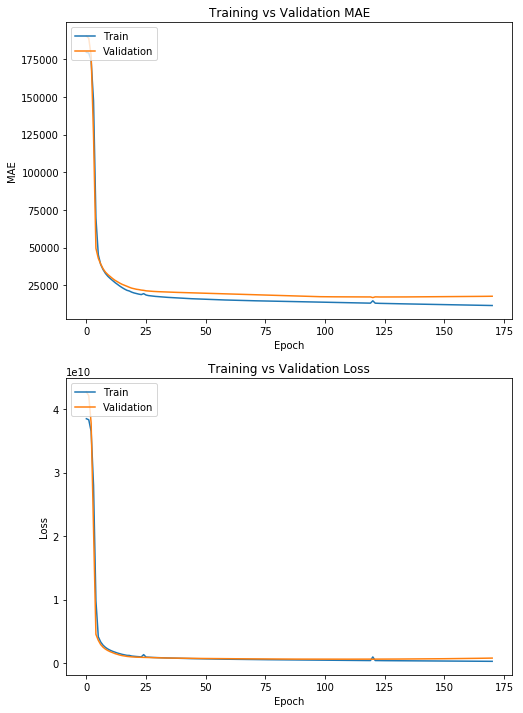

In [592]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return
plot_hist(model_history.history, xsize=8, ysize=12)

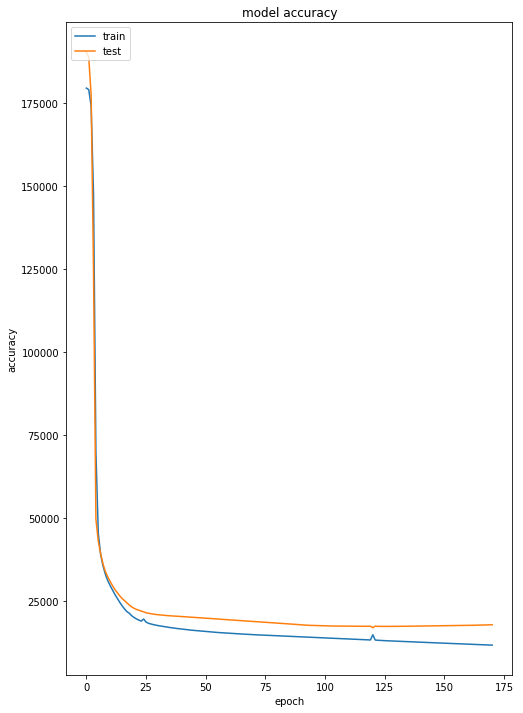

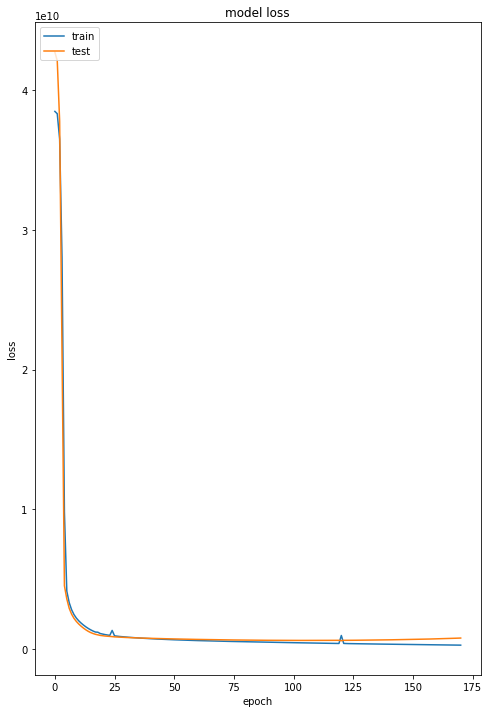

In [593]:
history = model_history
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [594]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 200)               78600     
_________________________________________________________________
dense_56 (Dense)             (None, 30)                6030      
_________________________________________________________________
dense_57 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_58 (Dense)             (None, 64)                2624      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 65        
Total params: 88,559
Trainable params: 88,559
Non-trainable params: 0
_________________________________________________________________


In [595]:
train_score = model.evaluate(x_train, y_train, verbose=0)
valid_score = model.evaluate(x_valid, y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))


Train MAE:  11619.5056 , Train Loss:  288597952.8567
Val MAE:  17782.885 , Val Loss:  800944018.8632


In [596]:
y_predict = model.predict(x_valid)

#print('Accuracy in testing data:', accuracy_score(y_valid.values[:,-1], y_predict[:,-1]))

In [597]:
#tf.global_variables()

In [598]:
# save model
#model.save('my_model.h5')

# load model
#another_model = tf.keras.models.load_model('my_model.h5')

In [599]:
y_predict = model.predict(test)

In [600]:
data = list(zip(test_id, y_predict[:,-1]))
df = pd.DataFrame(data, columns=['ID', 'SalePrice'])
df.to_csv("20190827_at082022_price_submission.csv", index=0)
df.head()

,ID,SalePrice
0,1461,130020.90625
1,1462,169206.43750
2,1463,186448.18750
3,1464,198536.90625
4,1465,204276.37500
